#**Implemented By Muhammad Hanan Asghar**

#**Getting Data**

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlretrieve
import re
import os

In [ ]:
print("Categories:",len(os.listdir("Emojis")))

Categories: 156


In [ ]:
!zip -r /content/emojis.zip /content/Emojis

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
!rm -rf "/content/Emojis"

In [ ]:
!mkdir "/content/Emojis"

In [ ]:
URL = "https://emojipedia.org/people/"
FOLDER_MAIN = "/content/Emojis"

r = requests.get(URL)

soup = BeautifulSoup(r.content, "lxml")

EMOJIS_LIST = soup.find_all("ul", {"class":"emoji-list"})

URLS_CRAWL = []

for emoji in EMOJIS_LIST[0]:
  if str(emoji).strip():
    URLS_CRAWL.append(emoji)
for URL in URLS_CRAWL:
  LINK = "https://emojipedia.org"+URL.find("a").get("href")
  FOLDER = deEmojify(URL.find("a").text.strip()).strip()
  PATH_MADED = FOLDER_MAIN+"/"+FOLDER
  os.mkdir(PATH_MADED)
  print(f"FOLDER > {PATH_MADED}")
  r = requests.get(LINK)
  soup = BeautifulSoup(r.content, "lxml")
  emojis = soup.find_all("div", {"class":"vendor-image"})
  id = 0
  for emoji in emojis:
    try:
      emoji_link = emoji.find("img")
      if str(emoji_link.get('src')).startswith("https"):
        id += 1
        LINK = emoji_link.get('src')
        print("IMAGE > "+FOLDER_MAIN+"/"+FOLDER+f"/image_{id}.jpg")
        print("LINK > "+LINK)
        urlretrieve(LINK, FOLDER_MAIN+"/"+FOLDER+f"/image_{id}.jpg")
    except:
      pass

IMAGE > /content/Emojis/Weary Face/image_11.jpg
LINK > https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/facebook/65/weary-face_1f629.png
IMAGE > /content/Emojis/Weary Face/image_12.jpg
LINK > https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/lg/57/weary-face_1f629.png
IMAGE > /content/Emojis/Weary Face/image_13.jpg
LINK > https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/htc/122/weary-face_1f629.png
IMAGE > /content/Emojis/Weary Face/image_14.jpg
LINK > https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/mozilla/36/weary-face_1f629.png
IMAGE > /content/Emojis/Weary Face/image_15.jpg
LINK > https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/softbank/145/weary-face_1f629.png
IMAGE > /content/Emojis/Weary Face/image_16.jpg
LINK > https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/docomo/205/weary-face_1f629.png
IMAGE > /content/Emojis/Weary Face/image_17.jpg
LINK > https://

#**Seperating Data**

In [2]:
!rm -rf Emojis && rm -rf emojis.zip

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/Emojis_2.zip

Archive:  /content/drive/MyDrive/Emojis_2.zip
   creating: Emojis/
   creating: Emojis/train/
   creating: Emojis/train/Positive/
  inflating: Emojis/train/Positive/image_341.jpg  
  inflating: Emojis/train/Positive/image_340.jpg  
  inflating: Emojis/train/Positive/image_339.jpg  
  inflating: Emojis/train/Positive/image_1.jpg  
  inflating: Emojis/train/Positive/image_2.jpg  
  inflating: Emojis/train/Positive/image_3.jpg  
  inflating: Emojis/train/Positive/image_4.jpg  
  inflating: Emojis/train/Positive/image_5.jpg  
  inflating: Emojis/train/Positive/image_6.jpg  
  inflating: Emojis/train/Positive/image_7.jpg  
  inflating: Emojis/train/Positive/image_8.jpg  
  inflating: Emojis/train/Positive/image_9.jpg  
  inflating: Emojis/train/Positive/image_10.jpg  
  inflating: Emojis/train/Positive/image_11.jpg  
  inflating: Emojis/train/Positive/image_12.jpg  
  inflating: Emojis/train/Positive/image_13.jpg  
  inflating: Emojis/train/Positive/image_14.jpg  
  inflating: Emojis/train/

In [ ]:
import os


train = "/xxxxxxxxxxxxxxxxxxxx/Emojis/train"
path = "/xxxxxxxxxxxxxxxxxxxxx/Emojis/valid"

for directory in os.listdir(train):
	directory_path = train+"/"+directory
	test_path = path+"/"+directory
	os.mkdir(test_path)
	print("DIRECTORY > "+test_path)
	for image in os.listdir(directory_path)[:2]:
		print("MOVED > "+image)
		os.rename(directory_path+"/"+image,test_path+"/"+image)


#**Preparing Data**

In [37]:
import torchvision.transforms as transforms


image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),

    'valid':
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [38]:
from torchvision import datasets
from torch.utils.data import DataLoader

data = {
    'train': datasets.ImageFolder("/content/Emojis/train", transform=image_transforms['train']),
    'valid': datasets.ImageFolder("/content/Emojis/valid", transform=image_transforms['valid'])
}


dataloaders = {
    'train': DataLoader(dataset = data['train'], batch_size=8, shuffle=True),
    'valid': DataLoader(dataset = data['valid'], batch_size=8, shuffle=True)
}

In [39]:
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([8, 3, 224, 224]), torch.Size([8]))

#**Model**

In [40]:
print(len(os.listdir("/content/Emojis/valid")), len(os.listdir("/content/Emojis/train")))

2 2


In [41]:
import os

print("No of Classes:",len(os.listdir("/content/Emojis/train")))

No of Classes: 2


In [42]:
from torchvision import models
model = models.vgg16(pretrained=True)

In [43]:
for param in model.parameters():
  param.requires_grad = False

In [44]:
import torch.nn as nn

model.classifier[6] = nn.Sequential(
    nn.Linear(4096, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 2),
    nn.LogSoftmax(dim=1)
)

In [45]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=2, bias=True)
    (4): LogSoftmax(dim=1)
  )
)

In [46]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} Total Parameters.')

135,309,890 Total Parameters.


In [47]:
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} Training Parameters.')

1,049,346 Training Parameters.


In [48]:
import torch


device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [49]:
model = model.to(device)

In [50]:
from torch import optim
from torch.autograd import Variable
import time

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

In [51]:
train_count = len(dataloaders['train'].dataset)
test_count = len(dataloaders['valid'].dataset)
print(train_count, test_count)

667 60


In [52]:
def train_n_build(n_epochs):
  best_accuracy = 0.0
  for epoch in range(n_epochs):
    start = time.time()
    model.train()

    train_accuracy=0.0
    train_loss=0.0


    for i,(images, labels) in enumerate(dataloaders['train']):
      if torch.cuda.is_available():
        images=Variable(images.to(device))
        labels=Variable(labels.to(device))
      optimizer.zero_grad()
      outputs = model(images)
      loss = loss_fn(outputs, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.cpu().data*images.size(0)
      _, prediction = torch.max(outputs.data,1)

      train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count

    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(dataloaders['valid']):
      if torch.cuda.is_available():
        images=Variable(images.to(device))
        labels=Variable(labels.to(device))

      outputs = model(images)
      _, prediction = torch.max(outputs.data, 1)
      test_accuracy += int(torch.sum(prediction == labels.data))
    
    test_accuracy = test_accuracy/test_count

    close = time.time()
    print('Epoch: '+str(epoch)+', Time: '+str(round(close - start, 2))+'s, Train Loss: '+str(train_loss.item())+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    if test_accuracy>best_accuracy:
      torch.save(model.state_dict(), 'best_checkpoint.model')
      best_accuracy = test_accuracy
    
    if (best_accuracy > 0.9) or (train_accuracy > 0.95):
      break

In [54]:
# train_n_build(100)

In [75]:
 def predict_image(image):
    image_tensor = image_transforms['valid'](image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    cnn = torch.load("/content/emoji_model.model")
    output = cnn(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [73]:
model.load_state_dict(torch.load("/content/emoji_sentiment.model"))

<All keys matched successfully>

In [74]:
torch.save(model, "/content/emoji_model.model")

In [56]:
from google.colab.patches import cv2_imshow

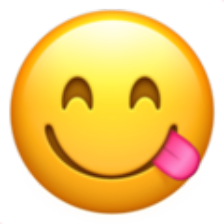

In [57]:
import cv2
img = cv2.imread('/content/face-savoring-food_1f60b.png', cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (224, 224))
cv2_imshow(img)

In [59]:
data['train'].class_to_idx

{'Negative': 0, 'Positive': 1}

In [76]:
from PIL import Image

image = Image.open("/content/face-savoring-food_1f60b.png").convert('RGB')

predict_image(image)

1

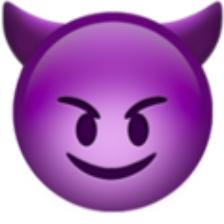

In [80]:
import cv2
img = cv2.imread('/content/smiling-face-with-horns_1f608.png', cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (224, 224))
cv2_imshow(img)

In [79]:
from PIL import Image

image = Image.open("/content/smiling-face-with-horns_1f608.png").convert('RGB')

predict_image(image)

0